# Sociogramme
Source : [Project Gutenberg](http://www.gutenberg.org/ebooks/798)   
Récupérer le texte du roman *Le rouge et le noir* de Stendhal au format txt

## Traitement automatique du langage naturel avec Spacy
- [Natural Language Processing (NLP)](https://fr.wikipedia.org/wiki/Traitement_automatique_du_langage_naturel)
- [Spacy une bibliothèque Python](https://spacy.io/)
- [Tokenisation du texte avec Spacy](https://spacy.io/usage/spacy-101#annotations-token)
- [Notebook](http://51.68.70.175:8000)


In [1]:
import spacy
from spacy_langdetect import LanguageDetector
import pandas as pd
from collections import Counter
from spacy.language import Language
import networkx as nx
import matplotlib.pyplot as plt

def create_lang_detector(nlp, name):
    return LanguageDetector()
Language.factory("language_detector", func=create_lang_detector)
# chargement du dictionnaire français
from spacy.lang.fr.stop_words import STOP_WORDS
nlp_fr = spacy.load("fr_core_news_sm")
nlp_fr.add_pipe('language_detector', last=True)


In [2]:
# Chargement du texte
text_fr = open("rougeetnoir.txt").read()
text_fr=text_fr.replace("Julien Sorel", "Julien")
text_fr=text_fr.replace("Mlle Élisa", "Élisa")
# Seqmentation du texte en chaiptres en utilisant le délimiteur aproprié : ici, "CHAPITRE"
book= text_fr.split("CHAPITRE ")

## Tokenisation et étiquetage 

In [3]:
# Tokenisation du 3ème chapitre
doc_fr = nlp_fr(book[3])

# On isole une phrase : la 11ème du chapitre
i=0
for sent in doc_fr.sents:
    if i==11 : 
        sent1=sent.text
        print (sent1.replace("\n"," "))
    i+=1

# Tokenisation de la phrase
doc_fr = nlp_fr(sent1)
for token in doc_fr: 
    print(' {0} :   , {1}' .format(token.text, token.pos_))

  Cette visite dura plusieurs heures.
 

 :   , SPACE
 Cette :   , DET
 visite :   , NOUN
 dura :   , VERB
 plusieurs :   , DET
 heures :   , NOUN
 . :   , PUNCT


## Les entités nommées
Une entité nommée est un «objet du monde réel» auquel est attribué un nom - par exemple, une personne, un pays, un produit ou un titre de livre   
[voir doc](https://spacy.io/api/annotation#named-entities)

In [4]:
doc_fr = nlp_fr(book[1])
# Récupération des lieux , personnes ... du chapitre 1
for token in doc_fr.ents: 
    print(' {0} :  {1}' .format(token.text, token.label_))

 PREMIER


UNE PETITE VILLE

     :  MISC
 But the :  MISC
 Verrières :  LOC
 Doubs :  LOC
 Espagnols :  LOC
 Verrières :  LOC
 Verra :  LOC
 Verrières :  LOC
 Doubs :  LOC
 Mulhouse :  LOC
 Napoléon :  PER
 Verrières :  LOC
 la France :  LOC
 M. :  PER
 Doubs :  LOC
 Verrières :  LOC
 M. de Rênal :  PER
 Bourgogne :  LOC
 M. de Rênal :  PER
 Louis X.

Depuis :  PER
 Doubs :  LOC
 M. de Rênal :  PER
 France :  LOC
 Allemagne :  LOC
 Leipzig :  LOC
 Francfort :  LOC
 En Franche :  MISC
 M. de
Rênal :  PER
 Verrières :  LOC
 SOREL :  ORG
 M. de
Rênal :  PER
 M. :  PER
 louis
d'or :  PER
 M. de Rênal :  PER
 Paris :  LOC
 Sorel :  PER
 Doubs :  LOC
 Sorel :  PER
 M. de Rênal :  PER
 vieux Sorel :  LOC
 M. :  PER
 Verrières :  LOC
 Paris :  LOC
 Franche-Comté :  LOC
 de France :  LOC
 États-Unis d'Amérique :  LOC


## Liste des personnages
Récupération de tous les personnages du roman
Comment éviter que spacy récupère des mots qui ne sont pas des personnages ou qui ne sont pas pertinents.

In [5]:
# Liste des personnages
perso=[]
for chapitre in book:
    doc_fr = nlp_fr(chapitre)
    for token in doc_fr.ents :
        if token.label_=="PER":
            perso0=token.text.replace("\n", " ")
            perso.append(perso0)

# Elimination des Noms peu présents ou incohérents          
persos=Counter(perso)
stopWords=['je','M.','pensa Julien','C. I','Allez','Mme','Monsieur','Voilà','Madame','madame']
finalPersos=[]
for p in persos:
    if persos[p]>3 and p not in stopWords:
        finalPersos.append(p)
finalPersos

['Napoléon',
 'M. de Rênal',
 'Sorel',
 'M. Valenod',
 'Mme de Rênal',
 'M. Appert',
 'marquis de La Mole',
 'je ',
 'Valenod',
 'Julien',
 'Mgr',
 'Bonaparte',
 'M. Chélan',
 'Mme de Rênal ',
 'Horace',
 'Julien ',
 'Élisa',
 'Mme Derville',
 'louis',
 'Don Juan',
 'M. Julien',
 'Robespierre',
 'Fouqué',
 'Voltaire',
 'Louis XV',
 'M. de Moirod',
 'Moirod',
 'M. Maslon',
 'Monseigneur',
 'M. de La Mole',
 'Cholin',
 'Stanislas',
 'Mme Valenod',
 'Geronimo',
 'Louis XIV',
 'M. Pirard',
 'Pirard',
 'abbé Pirard',
 'M. de Maistre',
 'Castanède',
 'Chazel',
 'Cicéron',
 'M. de Frilair',
 'Frilair',
 'Tacite',
 'abbé de Frilair',
 'Falcoz',
 'comte Norbert',
 'duc de Chaulnes',
 'Mme de La Mole',
 'Henri III',
 'M. Sorel',
 'Mlle Mathilde',
 'Norbert',
 'Mlle de La Mole',
 'Mathilde',
 'Tanbeau',
 'marquis de Croisenois',
 'comte de Caylus',
 'M. de Croisenois',
 'Luz',
 'M. de Nerval',
 'chevalier de Beauvoisis',
 'Beauvoisis',
 'prince Korasoff',
 'duc de Retz',
 'M. de Valenod',
 'Bonif

## Récupération des personnages par couples 
Les tokens étiquetés avec PER ( Personnage ) sont récupérés et mis en relation deux à deux lorsqu'ils se suivent.

In [6]:
# premier personnage de la relation
perso0=""
# deuxième personnage de la relation
perso1=""

# récupération des personnages du chapitre 9
doc_fr = nlp_fr(book[9])
for token in doc_fr.ents :
        if token.label_=="PER":
            perso0=token.text
            perso0=perso0.replace("\n", " ").replace("\r", " ").strip()
            if perso0 in finalPersos:
                if perso1!="" and perso0!=perso1 :
                    perso.append([perso0,perso1])
                perso1=perso0
                #print(' {0} :   , {1}' .format(token.text, token.label_))
df = pd.DataFrame(data=perso)

# Fabrication du fichier csv à partir des données récupérées
df.to_csv("file.csv", sep=',',index=False)

## Création du graphe pour un chapitre donné

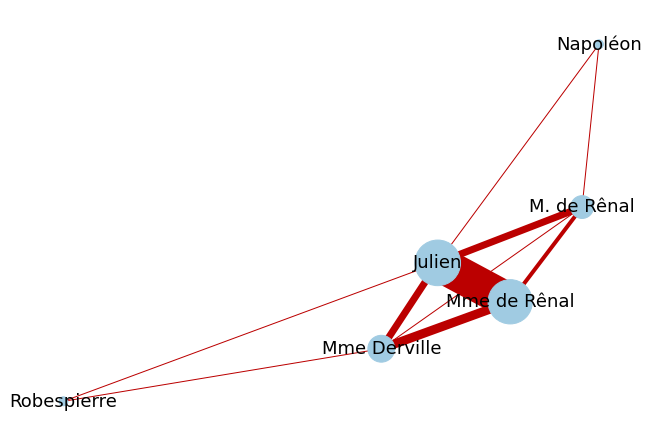

In [7]:
df = pd.read_csv("file.csv")

G = nx.from_pandas_edgelist(df, '0', '1',create_using=nx.MultiGraph(),)

from collections import Counter
width_dict = Counter(G.edges())

A=Counter(df['0'])
B=Counter(df['1'])
n_nodes=A+B

edge_width = [ (u,v,value) for ((u, v), value) in width_dict.items()]
node_size = [ (u,value) for (u,value) in n_nodes.items()]


G2 = nx.Graph()
#edge_width
for node in node_size:
    G2.add_node(node[0], size=node[1]*40)

for edge in edge_width:
    G2.add_edge(edge[0],edge[1],weight=edge[2])
weights = nx.get_edge_attributes(G2,'weight').values()
sizes = nx.get_node_attributes(G2,'size').values()

pos=nx.spring_layout(G2)

plt.figure(1,figsize=(9,6)) 
nx.draw(G2,pos,node_color='#A0CBE2',node_size=list(sizes),width=list(weights),edge_color='#BB0000',edge_cmap=plt.cm.Blues,with_labels=True,font_size=18)

plt.show()
